In [109]:
import matplotlib.pyplot as plt
import pandas as pd
import petl as etl
import seaborn as sns
import petlx.bio
import scipy
import numpy as np

In [156]:
bf_tbl = etl.fromtsv('/home/randomx/Dropbox/Ag1000G_carlo/notebooks/tables/hka/BFcol_vs_BFgam/putative_directional_selection_beta.tab')

In [157]:
gh_tbl = etl.fromtsv('/home/randomx/Dropbox/Ag1000G_carlo/notebooks/tables/hka/GHcol_vs_GHgam/putative_directional_selection_beta.tab')

In [158]:
gn_tbl = etl.fromtsv('/home/randomx/Dropbox/Ag1000G_carlo/notebooks/tables/hka/GNcol_vs_GNgam/putative_directional_selection_beta.tab')

In [159]:
tbl_all = etl.annex(bf_tbl, gh_tbl, gn_tbl)
tbl_all.displayall()

chrom,gene,segreg_c,pri_der_fix_c,score_c,segreg_g,pri_der_fix_g,score_g,score_tot,chrom,gene,segreg_c,pri_der_fix_c,score_c,segreg_g,pri_der_fix_g,score_g,score_tot,chrom,gene,segreg_c,pri_der_fix_c,score_c,segreg_g,pri_der_fix_g,score_g,score_tot
3R,AGAP007732,525,25,54.3486933436,633,31,81.7214281888,136.0701215324,3R,AGAP007732,125,23,79.5081914598,162,32,141.691888767,221.2000802268,3R,AGAP007732,63,24,132.260950758,90,33,244.017153823,376.278104581
X,AGAP013341,37,10,110.595539115,33,4,22.4765841881,133.0721233031,X,AGAP001035,16,13,135.557066942,25,6,29.0596679629,164.6167349049,X,AGAP001076,14,9,68.1163676021,11,10,128.4208181,196.53718570209998
X,AGAP001035,67,13,110.786262569,109,5,11.3266754184,122.1129379874,X,AGAP013341,11,10,108.963213464,7,4,34.296035244,143.259248708,X,AGAP001035,7,13,170.783157981,20,4,15.1774802724,185.9606382534
X,AGAP001076,119,10,38.4766077275,78,10,67.4529169256,105.9295246531,3R,AGAP007736,663,47,58.9857363828,859,56,77.8088307414,136.7945671242,X,AGAP013341,4,10,141.8166462,6,4,37.2707000598,179.0873462598
3R,AGAP007736,1966,29,13.9424575794,2299,48,45.3891959405,59.3316535199,X,AGAP001076,36,10,48.1812876155,26,10,74.5961305338,122.77741814929999,3R,AGAP007736,476,31,29.6046310191,401,51,146.455238388,176.0598694071
X,AGAP001026,32,5,31.7591254698,39,4,19.2554122217,51.014537691499996,3R,AGAP007731,32,11,63.3604541428,41,10,51.8093490646,115.16980320740001,3R,AGAP007731,13,11,99.745319935,27,10,71.6592941205,171.4046140555
3R,AGAP007731,146,10,31.314540398,197,8,16.7709893075,48.085529705499994,X,AGAP001026,10,5,34.5258951848,11,4,25.0028562946,59.5287514794,X,AGAP001023,29,6,18.1451751093,54,18,122.716837351,140.86201246029998
2L,AGAP006634,14439,2,11.2952008169,19773,1,13.7886692343,25.0838700512,2R,AGAP004643,32,5,13.3873816412,12,4,23.4034315739,36.7908132151,X,AGAP001029,2,5,64.4344783209,17,4,17.4400659815,81.8745443024
None,None,None,None,None,None,None,None,None,X,AGAP001043,140,12,18.9050629356,127,9,13.9222079773,32.8272709129,X,AGAP001026,5,5,44.8446261274,7,4,33.8354591697,78.68008529709999
None,None,None,None,None,None,None,None,None,X,AGAP001092,5,3,20.4581818734,4,2,12.0001883949,32.4583702683,X,AGAP001043,69,12,32.8769410807,73,10,30.3269789835,63.2039200642


In [83]:
header=['chrom', 'gene', 'score_bf', 'score_gh', 'score_gn']

In [129]:
tbl_shared = tbl_all.cut(0,1,8,17,26).rowslice(8).skip(1).pushheader(header).convert('score_bf', float).convert('score_gh', float).convert('score_gn', float)
tbl_shared.displayall()

chrom,gene,score_bf,score_gh,score_gn
3R,AGAP007732,136.0701215324,221.2000802268,376.278104581
X,AGAP013341,133.0721233031,164.6167349049,196.53718570209998
X,AGAP001035,122.1129379874,143.259248708,185.9606382534
X,AGAP001076,105.9295246531,136.7945671242,179.0873462598
3R,AGAP007736,59.3316535199,122.77741814929999,176.0598694071
X,AGAP001026,51.014537691499996,115.16980320740001,171.4046140555
3R,AGAP007731,48.085529705499994,59.5287514794,140.86201246029998
2L,AGAP006634,25.0838700512,36.7908132151,81.8745443024


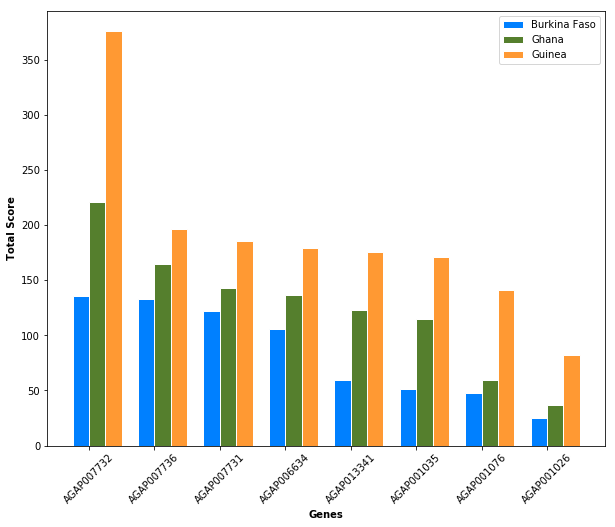

In [155]:
fig, ax = plt.subplots(figsize=(10, 8))

# set width of bar
barWidth = 0.25
 
# set height of bar
score_bf = tbl_shared['score_bf'].list()
score_gh = tbl_shared['score_gh'].list()
score_gn = tbl_shared['score_gn'].list()
 
# Set position of bar on X axis
r1 = np.arange(len(score_bf))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, score_bf, color='#0080ff', width=barWidth, edgecolor='white', label='Burkina Faso')
plt.bar(r2, score_gh, color='#557f2d', width=barWidth, edgecolor='white', label='Ghana')
plt.bar(r3, score_gn, color='#ff9933', width=barWidth, edgecolor='white', label='Guinea')
 
# Add xticks on the middle of the group bars
plt.xlabel('Genes', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(score_bf))], ['AGAP007732', 'AGAP007736', 'AGAP007731', 'AGAP006634', 'AGAP013341', 'AGAP001035', 'AGAP001076','AGAP001026'], rotation=45)
plt.ylabel('Total Score', fontweight='bold')



# Create legend & Show graphic
plt.legend()
plt.show()